# Summary
- use HuggingFace pipeline to perform topic modeling on subsets of data related to housing, harassment, and suicide
- analyze results to determine whether any tweets matched on those terms can be identified as having originated from an airmen or be pertaining to military personnel 

In [1]:
import pandas as pd
from ast import literal_eval

In [2]:
df_housing = pd.read_csv("tweets_2018_housing_zsl.csv")
df_harassment = pd.read_csv("tweets_2018_harassment_zsl.csv")
df_suicide = pd.read_csv("tweets_2018_suicide_zsl.csv")

In [3]:
# for audit trail of ZSC pipeline
housing_rows = df_housing.shape[0]
harassment_rows =  df_harassment.shape[0]
suicide_rows =  df_suicide.shape[0]

In [4]:
# remove na scores produced by ZSC pipeline
df_housing = df_housing.dropna(subset=['scores'])
df_harassment = df_harassment.dropna(subset=['scores'])
df_suicide = df_suicide.dropna(subset=['scores'])

In [5]:
# convert labels and scores lists from strings ("[...]") to lists
df_housing.labels = df_housing.labels.apply(literal_eval)
df_housing.scores = df_housing.scores.apply(literal_eval)

df_harassment.labels = df_harassment.labels.apply(literal_eval)
df_harassment.scores = df_harassment.scores.apply(literal_eval)

df_suicide.labels = df_suicide.labels.apply(literal_eval)
df_suicide.scores = df_suicide.scores.apply(literal_eval)

In [6]:
# for audit trail of ZSC pipeline
print("Rows lost to NA removal\n")
print("Housing DF:", df_housing.shape[0] - housing_rows)
print("Harassment DF:", df_harassment.shape[0] - harassment_rows)
print("Suicide DF:", df_suicide.shape[0] - suicide_rows)

Rows lost to NA removal

Housing DF: -2
Harassment DF: -3
Suicide DF: 0


In [7]:
def get_first_idx(lst):
    return lst[0]

In [8]:
# Create new columns to extract best fitting label for each row (tweet) and its respective confidence score
df_housing['most_similar'] = df_housing['labels'].apply(get_first_idx)
df_housing['most_sim_confidence'] = df_housing['scores'].apply(get_first_idx)

df_harassment['most_similar'] = df_harassment['labels'].apply(get_first_idx)
df_harassment['most_sim_confidence'] = df_harassment['scores'].apply(get_first_idx)

df_suicide['most_similar'] = df_suicide['labels'].apply(get_first_idx)
df_suicide['most_sim_confidence'] = df_suicide['scores'].apply(get_first_idx)

# Analysis

## Suicide

<AxesSubplot:title={'center':"Confidence that tweet w/ term 'suicide' is related to military or AF"}, ylabel='Frequency'>

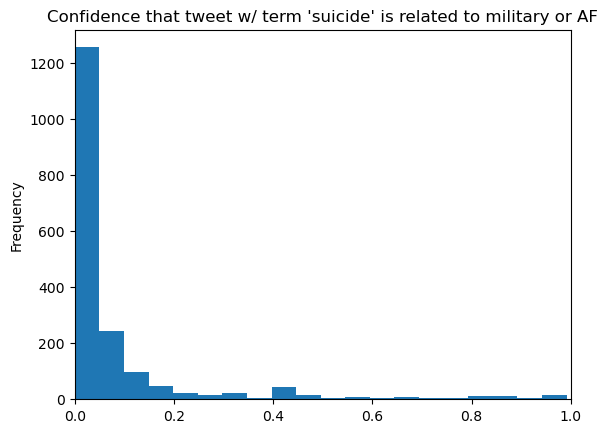

In [11]:
df_suicide['most_sim_confidence'].plot(kind='hist', bins=20, xlim=(0,1),
                                       title='Confidence that tweet w/ term \'suicide\' is related to military or AF')

In [22]:
print(df_suicide.most_sim_confidence.mean())
df_suicide.most_similar.value_counts()

0.08592251016507588


air force    1150
military      697
Name: most_similar, dtype: int64

## Housing

<AxesSubplot:title={'center':"Confidence that tweet w/ term 'housing' is related to military or AF"}, ylabel='Frequency'>

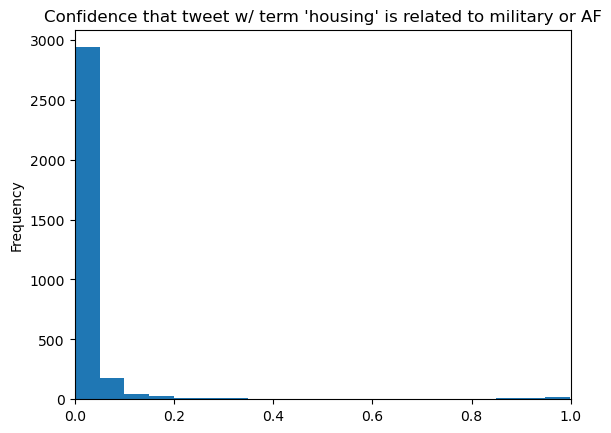

In [12]:
df_housing['most_sim_confidence'].plot(kind='hist', bins=20, xlim=(0,1),
                                       title='Confidence that tweet w/ term \'housing\' is related to military or AF')

In [23]:
print(df_housing.most_sim_confidence.mean())
df_housing.most_similar.value_counts()

0.031153994984808975


air force    2739
military      534
Name: most_similar, dtype: int64

## Harassment

<AxesSubplot:title={'center':"Confidence that tweet w/ term 'harassment' is related to military or AF"}, ylabel='Frequency'>

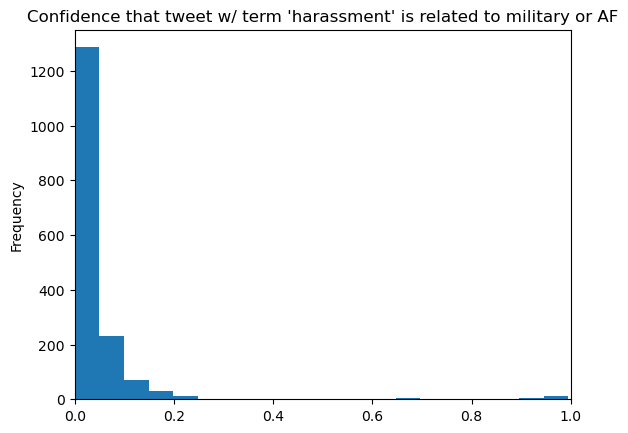

In [13]:
df_harassment['most_sim_confidence'].plot(kind='hist', bins=20, xlim=(0,1),
                                       title='Confidence that tweet w/ term \'harassment\' is related to military or AF')

In [24]:
print(df_harassment.most_sim_confidence.mean())
df_harassment.most_similar.value_counts()

0.04431548728886652


air force    1054
military      610
Name: most_similar, dtype: int64

## Close Examination of Term 'Suicide' Tweets

In [25]:
# look at tweets about suicide where confidence relating to 'military' or 'air force' is relatively high
df_subset_suicide = df_suicide[df_suicide['most_sim_confidence'] > 0.75]
df_subset_suicide.shape

(46, 16)

In [26]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', None, 'display.max_colwidth', -1):
    print (df_subset_suicide.tweet)

18      A sister shared with us the strory of her brother  a Marine veteran, talented trumpet player and clever problem-solver who committed suicide in a VA hospital parking lot this year.   He wanted to get better and didnt know how. And they gave him no plan  https://t.co/8rOxAc9sGj                
34      The rate is increasing substantially among those 18-34 but because of the sheer number of veterans over age 55, older veterans dying by suicide account for majority of deaths. We need to do a better job on communicating resources when transitioning out of the military  https://t.co/ldVPfgLWfw
67      yall think ppl that commit suicide are selfish but what about mfs with whole families that go to the military                                                                                                                                                                                        
72      Suicide prevention resources available for veterans, servicemembers  https://t.co/kEtL

### Findings
- **prominent commentary about veteran suicide and PTSD**
- **references to substance abuse (opioid crisis)**
- retaining links only moderately beneficial
    - I chose to retain links in my tweets so that I could examine some of the content contained in high-risk tweets
    - However, it seems that plenty of links are stale or not necessarily relevant
        - Ex (first link is stale, second is interesting):  613     We started doing the numbers and I think we lost more guys to suicide in our unit than we did while we were  in combat- 42-year-old veteran  https://t.co/PcnOf6atP1   PTSD veterans mentalhealth REAIM https://t.co/YeesO38UhG  
    - In the future, I would consider removing outbound links (http.*) before processing in pipelines

## Close Examination of Term 'Harassment' Tweets

In [37]:
# look at tweets about harassment where confidence relating to 'military' or 'air force' is relatively high
df_subset_harassment = df_harassment[df_harassment['most_sim_confidence'] > 0.70]
df_subset_harassment.shape

(19, 16)

In [34]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', None, 'display.max_colwidth', -1):
    print (df_subset_harassment.tweet)

317     Despite such reckless harassment, the United States Navy will continue to fly, sail and operate wherever international law allows and our national interests demand. We will not be intimidated; we will not stand down, declares .                                                            
358     Fort Meade Bioeffects of Selected Non-Lethal Weapons  https://t.co/34m3eR8r69 Nasa The future of War  https://t.co/eyi4GeQ9SW RF Microwave Radiation Biological Effects Rome Labs  https://t.co/VwXyiWhDkT Information on electronic harassment and gang stalking  https://t.co/dOVZrRs3P6     
361     Fort Meade Bioeffects of Selected Non-Lethal Weapons  https://t.co/34m3eQQQeB Nasa The future of War  https://t.co/eyi4Geyz1o RF Microwave Radiation Biological Effects Rome Labs  https://t.co/VwXyiWzeJt Information on electronic harassment and gang stalking  https://t.co/dOVZrRJFdG     
512     Yes!  going IN on why women need not just good policy but ALSO power. Women were being sent into combat 

### Findings
- no apparent relevance to USAF
- tweet about Chief Kathleen Stanley refers to a Fire Chief in Fairfax County, not USAF personel

## Close Examination of Term 'Housing' Tweets

In [35]:
# look at tweets about housing where confidence relating to 'military' or 'air force' is relatively high
df_subset_housing = df_housing[df_housing['most_sim_confidence'] > 0.70]
df_subset_housing.shape

(38, 16)

In [36]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', None, 'display.max_colwidth', -1):
    print (df_subset_housing.tweet)

117     Very proud of the young Marines in my neighborhood who rescued senior citizens from the Kappers Housing  https://t.co/mb3kXKZTUj it was burning.    https://t.co/Z3wkVAU1iX                                                                                                                            
134     Proud to be longtime neighbors with Marines at their oldest post at 8th and I  who today rescued elderly residents at DC housing complex fire.   https://t.co/pIt56hRRsd                                                                                                                               
138     Five Alarm Fire @ The usmarinebarracks housing complex. Major fire and looks like total destruction. Pray for our Marines and the Firefighters dcUrbanLife iLoveDC SemperFi @ Marine  https://t.co/wPze3fittC                                                                                          
157     Hardworking servicemembers should not have to fight bureaucracy to receive the h

### Findings
- **significantly more relevant conversations** 
    - Hardworking servicemembers should not have to fight bureaucracy to receive the housing allowance theyve earned. Today, I sent a letter to Governor Ducey requesting immediate correction for a shameful clawback of housing funds at Silverbell. AZ01  https://t.co/5o02zij6PM    
    - 438     Just on the subject of military construction: for years, this has been the subject of hearing after hearing: rotted-out, moldy, unkempt military base facilities and family housing - and funding repairs for that in fiscal 19 was in the \$10 billion range.  
    - 606     Our Veterans Housing First team held a luncheon on Friday to honor and celebrate our clients who have served in the armed forces. We are grateful for their tireless work to transform the lives of Veterans experiencing homelessness and all veterans. pathwaysdc VeteranDay  https://t.co/lVjiL5Sky2 
- **unclear whether such results would be repeatable but this is usable information**
    


## Examine connections with base/region
- we find that the most negative terms are primarily coming from JB Andrews, however Andrews comprised the vast majority of the 2018 dataset

In [28]:
df = pd.read_csv("tweets_2018_sa.csv")
df.drop(['Unnamed: 0','Unnamed: 0.1', 'username', 'name'],
        axis=1, inplace=True) # Unnamed cols were accidental artifacts, drop names for privacy 

In [30]:
# recall distribution of base in 2018
df.base.value_counts()

JB ANDREWS           57390
SALT LAKE CITY         365
JBMDL MCGUIRE          308
CAVALIER               191
JB ELMENDORF-RICH      185
BANGOR INTL            151
MINOT                   82
Name: base, dtype: int64

In [17]:
df_suicide.base.value_counts()

JB ANDREWS    1847
Name: base, dtype: int64

In [18]:
df_harassment.base.value_counts()

JB ANDREWS        1639
SALT LAKE CITY      20
MINOT                2
Name: base, dtype: int64

In [19]:
df_housing.base.value_counts()

JB ANDREWS    3266
MINOT            5
Name: base, dtype: int64